In [1]:
%matplotlib widget

import numpy as np
import h5py
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import os
import cv2
import sys
import pywt
from pathlib import Path
from IPython.display import display
import seaborn as sns
from skimage.measure import find_contours
from skimage.draw import polygon2mask

In [9]:
mouse = "cfm002mjr"
date = 240510
rec = 'meas01'

noisy_path = "N:/GEVI_Wave/Analysis/Visual/" + mouse + "/20" + str(date) + "/" + rec + '/cG_unmixed_dFF.h5'
denoised_path = "N:/GEVI_Wave/Analysis/Visual/" + mouse + "/20" + str(date) + "/" + rec + '/cG_unmixed_dFF_denoised.h5'

with h5py.File(noisy_path, 'r') as mov_file:
    specs = mov_file["specs"]
    fps = specs['fps'][()][0][0][0]
    raw_mask = specs["extra_specs"]["mask"][()][0]
    binning = specs["binning"][()][0][0][0]  # Extract binning factor

    # Extract raw outlines
    raw_outlines = specs["extra_specs"]["allenMapEdgeOutline"][()]
    spaceorigin = specs["spaceorigin"][()].flatten()  # Load space origin
    spaceorigin = (spaceorigin - 1) / binning + 1  # Apply space origin transformation

    # Select outlines (default all if not specified)
    outlines_nums = np.arange(raw_outlines.shape[2])  # Equivalent to 1:size(raw_outlines, 3)
    
    # Adjust outlines
    outlines = raw_outlines[:, :, outlines_nums] / binning
    outlines[:, 0, :] -= spaceorigin[1] - 1  # Adjust Y-coordinates
    outlines[:, 1, :] -= spaceorigin[0] - 1  # Adjust X-coordinates

with h5py.File(denoised_path, 'r') as mov_file:
    mov = mov_file['mov'][()]
    movie_full = np.nan_to_num(mov)


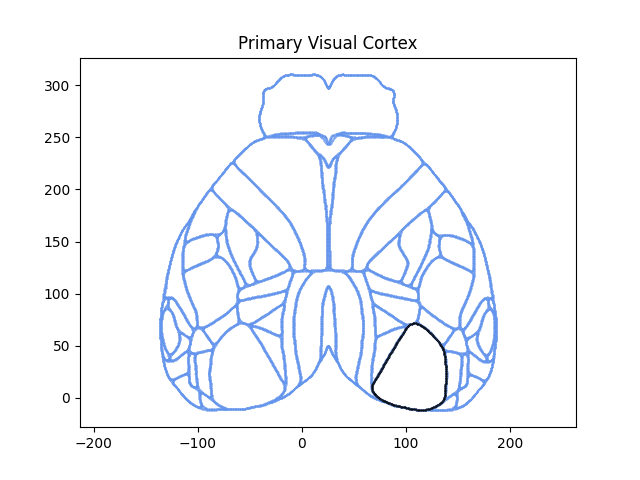

In [32]:
plt.close('all')
for i in range(outlines.shape[0]):  
        x = outlines[i, 1, :]
        y = outlines[i, 0, :]

        plt.scatter(x, y, s=0.1, c='cornflowerblue')  

plt.scatter(outlines[37, 1, :], outlines[37, 0, :], c='black', s=0.1)

plt.axis("equal")  # Keep aspect ratio
plt.title("Primary Visual Cortex")
plt.show()

c:\Users\Katie\Documents\Katie\Code\perception_project\perception_project\Lib\site-packages\matplotlib\animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


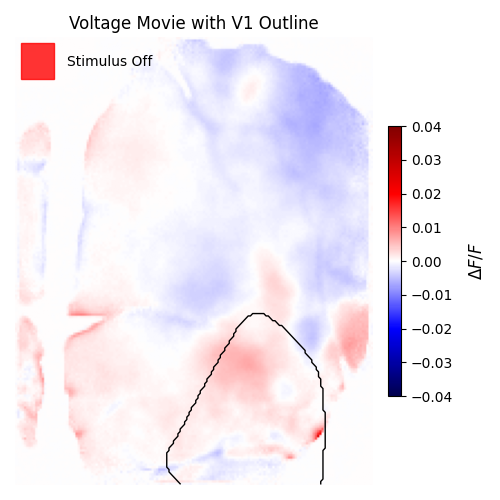

In [38]:
plt.close('all')

#stim_1 = movie_full[round(66*fps):round(70*fps)]
stim_1 = movie_full[round(172*fps):round(175*fps)]
#stim_1 = movie_full[round(202*fps):round(204*fps)]

movie=stim_1

# === Stimulus timing (relative to clip start) ===
stim_start = 0.57099# 1.8599# 0.62       # seconds after start of movie
stim_duration = 0.537000#0.5159#0.55    # seconds
stim_start_frame = int(stim_start * fps)
stim_end_frame = int((stim_start + stim_duration) * fps)

# === Setup ===
i = 37  # V1 index
frame0 = movie[0]
movie_shape = movie.shape[1:3]  # (height, width)

# Generate mask and contours
total_mask = np.zeros(movie_shape, dtype=bool)
outline = outlines[i, :, :]
valid_indices = ~np.isnan(outline).any(axis=0)
x_coords = outline[1, valid_indices]
y_coords = outline[0, valid_indices]

roi_mask = polygon2mask(movie_shape, np.column_stack((y_coords, x_coords)))
roi_mask = np.flipud(roi_mask).astype(bool)
total_mask |= roi_mask
contours = find_contours(total_mask, level=0.5)

# === Plot with animation ===
fig, ax = plt.subplots()
im = ax.imshow(frame0, cmap='seismic', vmin=-0.04, vmax=0.04, aspect='auto')
ax.axis("off")
fig.set_size_inches(5, 5)
ax.set_title("Voltage Movie with V1 Outline")

# Add contours
lines = []
for contour in contours:
    line, = ax.plot(contour[:, 1], contour[:, 0], color='black', linewidth=1)
    lines.append(line)

# Add colorbar and label
cbar = fig.colorbar(im, ax=ax, fraction=0.035, pad=0.04)
cbar.set_label(r'$\Delta F/F$', fontsize=12, labelpad=10)
cbar.ax.yaxis.label.set_fontsize(12)

# === Stimulus indicator ===
stim_rect = plt.Rectangle((2, 2), 15, 15, color='red', alpha=0.8)
stim_text = ax.text(23, 10, 'Stimulus Off', color='black', va='center', fontsize=10)

ax.add_patch(stim_rect)

# Update function for animation
def update(j):
    im.set_array(movie[j])
    # Stimulus timing logic
    if stim_start_frame <= j < stim_end_frame:
        stim_rect.set_color('green')
        stim_text.set_text(f'Stimulus On {j}')
    else:
        stim_rect.set_color('red')
        stim_text.set_text(f'Stimulus Off {j}')
    
    return [im, stim_rect, stim_text] + lines

ani = animation.FuncAnimation(fig, update, frames=movie.shape[0], interval=500, blit=False)
#ani.save("debug_movie.mp4", fps=fps, dpi=150)
plt.tight_layout()
plt.show()

In [39]:
plt.close('all')

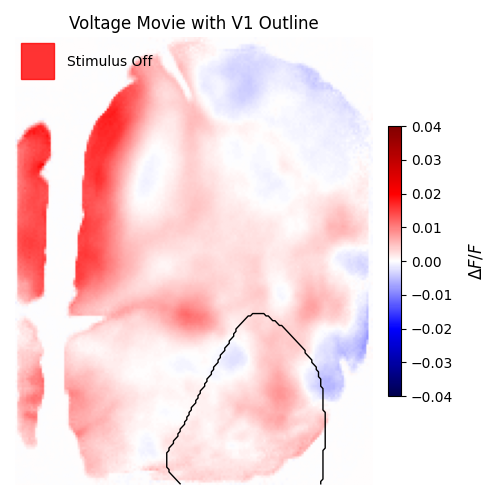

In [37]:
%matplotlib widget
plt.close('all')

#stim_1 = movie_full[round(66*fps):round(70*fps)]
#stim_1 = movie_full[round(172*fps):round(175*fps)]
stim_1 = movie_full[round(202*fps):round(204*fps)]

movie=stim_1

# === Stimulus timing (relative to clip start) ===
stim_start = 0.57099# 1.8599# 0.62       # seconds after start of movie
stim_duration = 0.537000#0.5159#0.55    # seconds
stim_start_frame = int(stim_start * fps)
stim_end_frame = int((stim_start + stim_duration) * fps)

# === Setup ===
i = 37  # V1 index
frame0 = movie[0]
movie_shape = movie.shape[1:3]  # (height, width)

# Generate mask and contours
total_mask = np.zeros(movie_shape, dtype=bool)
outline = outlines[i, :, :]
valid_indices = ~np.isnan(outline).any(axis=0)
x_coords = outline[1, valid_indices]
y_coords = outline[0, valid_indices]

roi_mask = polygon2mask(movie_shape, np.column_stack((y_coords, x_coords)))
roi_mask = np.flipud(roi_mask).astype(bool)
total_mask |= roi_mask
contours = find_contours(total_mask, level=0.5)

# === Plot with animation ===
fig, ax = plt.subplots()
im = ax.imshow(frame0, cmap='seismic', vmin=-0.04, vmax=0.04, aspect='auto')
ax.axis("off")
fig.set_size_inches(5, 5)
ax.set_title("Voltage Movie with V1 Outline")

# Add contours
lines = []
for contour in contours:
    line, = ax.plot(contour[:, 1], contour[:, 0], color='black', linewidth=1)
    lines.append(line)

# Add colorbar and label
cbar = fig.colorbar(im, ax=ax, fraction=0.035, pad=0.04)
cbar.set_label(r'$\Delta F/F$', fontsize=12, labelpad=10)
cbar.ax.yaxis.label.set_fontsize(12)

# === Stimulus indicator ===
stim_rect = plt.Rectangle((2, 2), 15, 15, color='red', alpha=0.8)
stim_text = ax.text(23, 10, 'Stimulus Off', color='black', va='center', fontsize=10)

ax.add_patch(stim_rect)

stim_text_obj = None  # Global reference

def update(j):
    global stim_text_obj

    im.set_array(movie[j])
    print(f"Frame index j: {j}")

    # Remove old text object if it exists
    if stim_text_obj:
        stim_text_obj.remove()

    # Stimulus logic and color
    if stim_start_frame <= j < stim_end_frame:
        stim_rect.set_color('green')
        stim_text_str = f'Stimulus On {j}'
    else:
        stim_rect.set_color('red')
        stim_text_str = f'Stimulus Off {j}'

    # Create new text object
    stim_text_obj = ax.text(23, 10, stim_text_str, color='black', va='center', fontsize=10)

    return [im, stim_rect, stim_text_obj] + lines

ani = animation.FuncAnimation(fig, update, frames=range(movie.shape[0]), interval=500, blit=False)
#ani.save("debug_movie.mp4", fps=fps, dpi=150)
plt.tight_layout()
plt.show()

